<a href="https://colab.research.google.com/github/Gaurav-phatkare/Classification-Models-Tensorflow/blob/main/bilabel_classification_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Fri Jul 28 16:47:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os

In [3]:
!pip install kaggle

In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [13]:
import os
os.chdir("/content/drive/MyDrive/CatAndDogsDS")

In [14]:
!ls "/content/drive/MyDrive/CatAndDogsDS/"

In [15]:
os.environ['KAGGLE_USERNAME'] = "gauravphatkare"
os.environ['KAGGLE_KEY'] = "48e510c8b00f0155375c3605c916efd5"

In [16]:
!kaggle datasets download -d ashfakyeafi/cat-dog-images-for-classification

100% 542M/545M [00:31<00:00, 19.7MB/s]
100% 545M/545M [00:31<00:00, 18.4MB/s]


In [ ]:
!unzip /content/drive/MyDrive/CatAndDogsDS/cat-dog-images-for-classification.zip

In [77]:
import os
import shutil
import matplotlib.image as mpimg

def get_image_size(image_path):
    image = mpimg.imread(image_path)
    height, width, _ = image.shape
    return height, width

def move_sized_images(source, destination):
    if not os.path.exists(destination):
        os.makedirs(destination)

    image_files = [f for f in os.listdir(source) if f.endswith(('.jpg','.jpeg','.png'))]

    for image_file in image_files:
        image_path = os.path.join(source, image_file)
        height, width = get_image_size(image_path)

        if width >= 350 and height >= 350:
            destination_path = os.path.join(destination, image_file)
            shutil.move(image_path, destination_path)
            print(f"Moved: {image_file}")

move_sized_images('/content/drive/MyDrive/CatAndDogsDS/cat_dog','/content/drive/MyDrive/CatAndDogsDS/sortedCatDog02')


Streaming output truncated to the last 5000 lines.
Moved: dog.11512.jpg
Moved: dog.11517.jpg
Moved: dog.11518.jpg
Moved: dog.1152.jpg
Moved: dog.11520.jpg
Moved: dog.11521.jpg
Moved: dog.11522.jpg
Moved: dog.11524.jpg
Moved: dog.11525.jpg
Moved: dog.11531.jpg
Moved: dog.11533.jpg
Moved: dog.11538.jpg
Moved: dog.1154.jpg
Moved: dog.11542.jpg
Moved: dog.11543.jpg
Moved: dog.11544.jpg
Moved: dog.11548.jpg
Moved: dog.11550.jpg
Moved: dog.11555.jpg
Moved: dog.11556.jpg
Moved: dog.11557.jpg
Moved: dog.11559.jpg
Moved: dog.11560.jpg
Moved: dog.11562.jpg
Moved: dog.11565.jpg
Moved: dog.11569.jpg
Moved: dog.11570.jpg
Moved: dog.11575.jpg
Moved: dog.11576.jpg
Moved: dog.1158.jpg
Moved: dog.11581.jpg
Moved: dog.11582.jpg
Moved: dog.11587.jpg
Moved: dog.11588.jpg
Moved: dog.1159.jpg
Moved: dog.11594.jpg
Moved: dog.11596.jpg
Moved: dog.1160.jpg
Moved: dog.11600.jpg
Moved: dog.11601.jpg
Moved: dog.11603.jpg
Moved: dog.11604.jpg
Moved: dog.11605.jpg
Moved: dog.11615.jpg
Moved: dog.11618.jpg
Moved: do

(-0.5, 498.5, 374.5, -0.5)

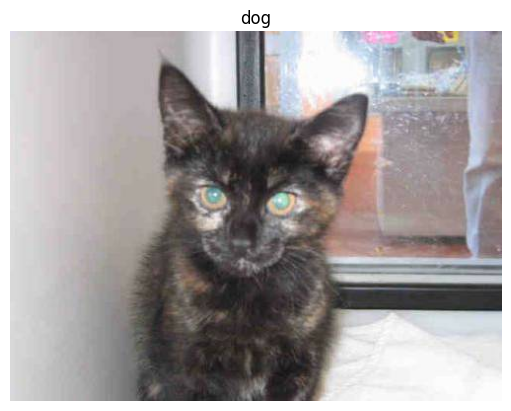

In [79]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

random_image = random.sample(os.listdir("/content/drive/MyDrive/CatAndDogsDS/sortedCatDog02"),1)

img = mpimg.imread("/content/drive/MyDrive/CatAndDogsDS/sortedCatDog02" + "/" + random_image[0])
plt.imshow(img)

plt.title('dog')

plt.axis("off")



In [80]:
import os
import shutil

def classify_images_by_prefix(source_folder, destination_folder1, destination_folder2, prefix1, prefix2):
    for filename in os.listdir(source_folder):
        if filename.endswith(".jpg"):
            if filename.startswith(prefix1):
                source_path = os.path.join(source_folder, filename)
                destination_path = os.path.join(destination_folder1, filename)
                shutil.copyfile(source_path, destination_path)
            elif filename.startswith(prefix2):
                source_path = os.path.join(source_folder, filename)
                destination_path = os.path.join(destination_folder2, filename)
                shutil.copyfile(source_path, destination_path)

# Example usage:
source_folder = "/content/drive/MyDrive/CatAndDogsDS/sortedCatDog02"
destination_folder_cat = "/content/drive/MyDrive/CatAndDogsDS/catss"
destination_folder_dog = "/content/drive/MyDrive/CatAndDogsDS/dogss"
prefix_cat = "cat"
prefix_dog = "dog"

classify_images_by_prefix(source_folder, destination_folder_cat, destination_folder_dog, prefix_cat, prefix_dog)

# source_folder = '/content/drive/MyDrive/CatsAndDogsDS/cat_dog'
# destination_folder1 = '/content/drive/MyDrive/CatsAndDogsDS/cat_dog/cats/'
# destination_folder2 = '/content/drive/MyDrive/CatsAndDogsDS/cat_dog/dogs/'
# class1 = 'cat'
# class2 = 'dog'

# classify_images(source_folder, destination_folder1, destination_folder2, class1, class2)

In [81]:
import os
import random
import shutil

def split_data(source_folder, train_folder, test_folder, train_ratio = 0.8):

    image_files = [file for file in os.listdir(source_folder) if file.endswith(".jpg")]

    num_train = int(len(image_files) * train_ratio)
    num_test = len(image_files) - num_train

    random.shuffle(image_files)


    for file in image_files[:num_train]:
        source_path = os.path.join(source_folder, file)
        destination_path = os.path.join(train_folder, file)
        shutil.copyfile(source_path, destination_path)

    for file in image_files[num_train:]:
        source_path = os.path.join(source_folder, file)
        destination_path = os.path.join(test_folder, file)
        shutil.copyfile(source_path, destination_path)


source_folder_cat = '/content/drive/MyDrive/CatAndDogsDS/catss'
source_folder_dog = '/content/drive/MyDrive/CatAndDogsDS/dogss'
train_folder_cat = "/content/drive/MyDrive/CatAndDogsDS/split02/train/cat"
train_folder_dog = "/content/drive/MyDrive/CatAndDogsDS/split02/train/dog"
test_folder_cat = "/content/drive/MyDrive/CatAndDogsDS/split02/test/cat"
test_folder_dog = "/content/drive/MyDrive/CatAndDogsDS/split02/test/dog"


split_data(source_folder_cat, train_folder_cat, test_folder_cat)

split_data(source_folder_dog, train_folder_dog, test_folder_dog)

In [84]:
!rmdir /content/drive/MyDrive/CatDogSplit02/.ipynb_checkpoints

In [86]:
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/CatDogSplit02"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/drive/MyDrive/CatDogSplit02'.
There are 2 directories and 0 images in '/content/drive/MyDrive/CatDogSplit02/train'.
There are 0 directories and 4896 images in '/content/drive/MyDrive/CatDogSplit02/train/cat'.
There are 0 directories and 4628 images in '/content/drive/MyDrive/CatDogSplit02/train/dog'.
There are 2 directories and 0 images in '/content/drive/MyDrive/CatDogSplit02/test'.
There are 0 directories and 1225 images in '/content/drive/MyDrive/CatDogSplit02/test/cat'.
There are 0 directories and 1158 images in '/content/drive/MyDrive/CatDogSplit02/test/dog'.


In [ ]:
# sort images with size above 450

In [24]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/drive/MyDrive/CatDogSplit/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['cat' 'dog']


In [25]:
# view random images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

    random_image = random.sample(os.listdir(target_folder),1)

    image = mpimg.imread(target_folder + '/' + random_image[0])

    plt.imshow(image)
    plt.title(target_class)
    plt.axis("off");

    print(f'Image shape:{image.shape}')

    return image

Image shape:(241, 304, 3)


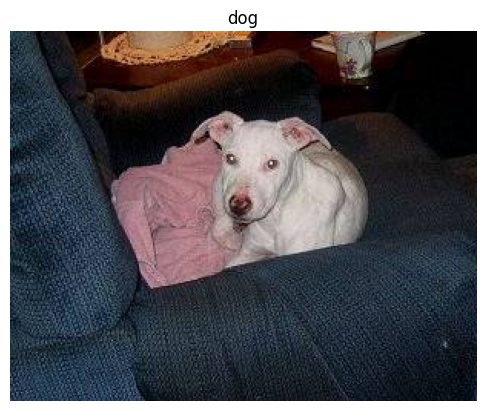

In [28]:
img = view_random_image(target_dir = '/content/drive/MyDrive/CatDogSplit/train/',
                        target_class = "dog")


In [29]:
img

array([[[ 41,  69,  81],
        [ 48,  76,  88],
        [ 35,  62,  73],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[ 43,  71,  83],
        [ 48,  76,  88],
        [ 21,  48,  59],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[ 33,  61,  73],
        [ 40,  68,  80],
        [ 16,  43,  54],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       ...,

       [[ 29,  47,  67],
        [ 21,  39,  59],
        [ 51,  69,  89],
        ...,
        [ 17,  29,  41],
        [  9,  21,  33],
        [ 49,  61,  73]],

       [[ 59,  77,  99],
        [ 20,  38,  58],
        [ 41,  59,  81],
        ...,
        [ 32,  44,  56],
        [  0,  12,  24],
        [ 48,  60,  72]],

       [[ 62,  80, 104],
        [ 37,  55,  77],
        [ 23,  41,  65],
        ...,
        [ 19,  31,  43],
        [  0,  11,  25],
        [ 35,  49,  62]]

In [30]:
img/255

array([[[0.16078431, 0.27058824, 0.31764706],
        [0.18823529, 0.29803922, 0.34509804],
        [0.1372549 , 0.24313725, 0.28627451],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.16862745, 0.27843137, 0.3254902 ],
        [0.18823529, 0.29803922, 0.34509804],
        [0.08235294, 0.18823529, 0.23137255],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.12941176, 0.23921569, 0.28627451],
        [0.15686275, 0.26666667, 0.31372549],
        [0.0627451 , 0.16862745, 0.21176471],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.11372549, 0.18431373, 0.2627451 ],
        [0.08235294, 0.15294118, 0.23137255],
        [0.2       , 0

(-0.5, 499.5, 496.5, -0.5)

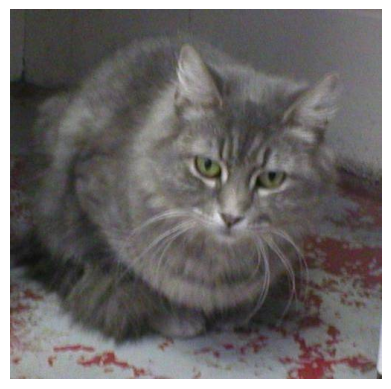

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

random_image = random.sample(os.listdir("/content/cat_dog"),1)

img = mpimg.imread("/content/cat_dog" + "/" + random_image[0])
plt.imshow(img)

# plt.title('dog')

plt.axis("off")



In [87]:
# We Need to convert Images into Vectors
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)


train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)


train_dir = '/content/drive/MyDrive/CatDogSplit02/train'
test_dir = '/content/drive/MyDrive/CatDogSplit02/test'


train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (360, 360),
                                               class_mode = 'binary',
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                               target_size = (360, 360),
                                               class_mode = 'binary',
                                               seed = 42)


Found 9524 images belonging to 2 classes.
Found 2383 images belonging to 2 classes.


In [88]:
# create a CNN model

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 20,
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = (360,360, 3)),
    tf.keras.layers.Conv2D(20, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])


# compile a model

model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
298/298 [==============================] - 96s 312ms/step - loss: 0.6587 - accuracy: 0.5896 - val_loss: 0.6014 - val_accuracy: 0.6672
Epoch 2/5
298/298 [==============================] - 84s 282ms/step - loss: 0.5416 - accuracy: 0.7268 - val_loss: 0.5892 - val_accuracy: 0.6932
Epoch 3/5
298/298 [==============================] - 84s 282ms/step - loss: 0.4048 - accuracy: 0.8172 - val_loss: 0.6584 - val_accuracy: 0.6945
Epoch 4/5
298/298 [==============================] - 90s 288ms/step - loss: 0.2452 - accuracy: 0.9001 - val_loss: 0.8388 - val_accuracy: 0.6794
Epoch 5/5
298/298 [==============================] - 82s 276ms/step - loss: 0.1248 - accuracy: 0.9534 - val_loss: 1.3140 - val_accuracy: 0.6907


In [89]:
# plot validation and training curve separately
import matplotlib.pyplot as plt

def plot_loss_curve(hist):
  loss = hist.history['loss']
  val_loss = hist.history['val_loss']

  accuracy = hist.history['accuracy']
  val_accuracy = hist.history['val_accuracy']

  epochs = range(len(hist.history['loss']))

  fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))

  # plot loss
  ax1.set_title("loss")
  ax1.plot(epochs, loss, label = 'training_loss')
  ax1.plot(epochs, val_loss, label = 'val_loss')
  ax1.set_xlabel('epochs')
  # ax1.title('loss')
  ax1.legend()

  # plot accuracy
  # plt.figure()
  ax2.set_title("accuracy")
  ax2.plot(epochs, accuracy, label = 'training_accuracy')
  ax2.plot(epochs, val_accuracy, label = 'val_accuracy')
  ax2.set_xlabel('epochs')
  # ax2.title('accuracy')
  ax2.legend()


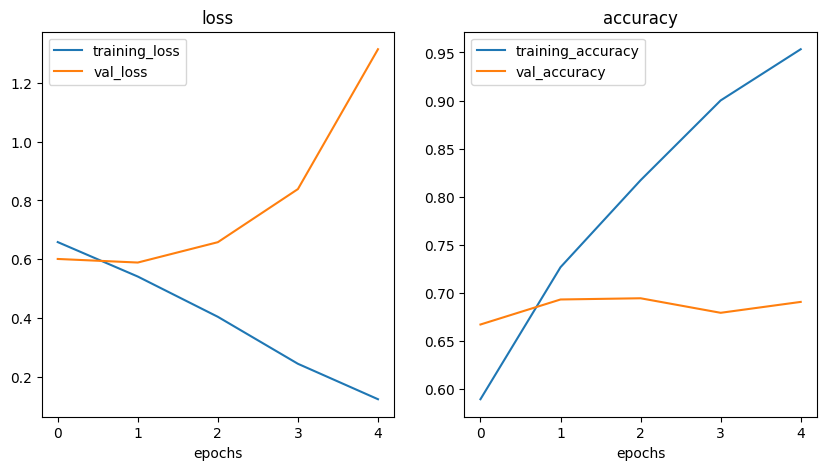

In [90]:
plot_loss_curve(history_1)

In [41]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 358, 358, 20)      560       
                                                                 
 conv2d_5 (Conv2D)           (None, 356, 356, 20)      3620      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 178, 178, 20)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 176, 176, 10)      1810      
                                                                 
 conv2d_7 (Conv2D)           (None, 174, 174, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 87, 87, 10)       0         
 2D)                                                  

In [42]:
# set random seed
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (360,360,3)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# compile the model

model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [43]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 388800)            0         
                                                                 
 dense_2 (Dense)             (None, 100)               38880100  
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 38,900,401
Trainable params: 38,900,401
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Fit the model
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
625/625 [==============================] - 164s 258ms/step - loss: 2.4629 - accuracy: 0.5188 - val_loss: 0.7221 - val_accuracy: 0.5034
Epoch 2/5
625/625 [==============================] - 168s 269ms/step - loss: 0.7737 - accuracy: 0.5354 - val_loss: 0.7022 - val_accuracy: 0.5810
Epoch 3/5
625/625 [==============================] - 158s 253ms/step - loss: 0.6965 - accuracy: 0.5363 - val_loss: 0.6926 - val_accuracy: 0.5098
Epoch 4/5
625/625 [==============================] - 169s 270ms/step - loss: 0.6928 - accuracy: 0.5021 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
625/625 [==============================] - 160s 257ms/step - loss: 0.6932 - accuracy: 0.4940 - val_loss: 0.6932 - val_accuracy: 0.5000


<Axes: >

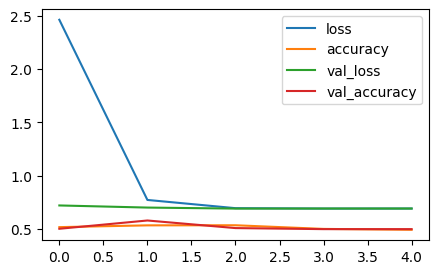

In [47]:
import pandas as pd

pd.DataFrame(history_2.history).plot(figsize = (5,3))

## Be One with data

Image shape:(499, 375, 3)
Image shape:(374, 500, 3)


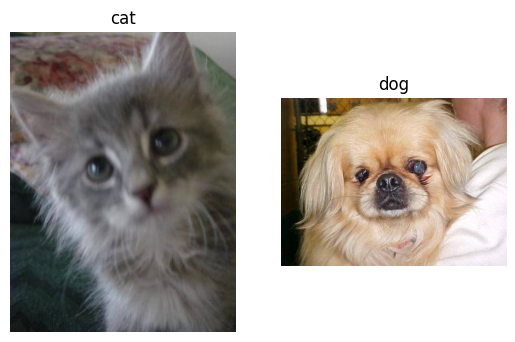

In [95]:
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(1, 2, 1)

cat_image = view_random_image('/content/drive/MyDrive/CatDogSplit02/train/', 'cat')

plt.subplot(1, 2, 2)
dog_image = view_random_image('/content/drive/MyDrive/CatDogSplit02/train/', "dog")

In [96]:
cat_image.shape

(499, 375, 3)

In [97]:
# define training and test directory paths

train_dir = '/content/drive/MyDrive/CatDogSplit02/train'
test_dir = '/content/drive/MyDrive/CatDogSplit02/test'



In [109]:
# rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)


In [111]:
# turn it into batches

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (512, 512),
                                               class_mode = 'binary',
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                               target_size = (512, 512),
                                               class_mode = 'binary',
                                               seed = 42)

Found 9524 images belonging to 2 classes.
Found 2383 images belonging to 2 classes.


In [112]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [113]:
images.shape

(32, 512, 512, 3)

#Model Baseline: First model

In [114]:
# build a model

baseline_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           strides = 1,
                           padding = "valid",
                           activation = 'relu',
                           input_shape = (512, 512, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),


    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [115]:
# model compile

baseline_model.compile(loss = 'binary_crossentropy',
                       optimizer = tf.keras.optimizers.Adam(),
                       metrics = ['accuracy'])

In [116]:
baseline_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 510, 510, 10)      280       
                                                                 
 conv2d_25 (Conv2D)          (None, 508, 508, 10)      910       
                                                                 
 conv2d_26 (Conv2D)          (None, 506, 506, 10)      910       
                                                                 
 flatten_8 (Flatten)         (None, 2560360)           0         
                                                                 
 dense_9 (Dense)             (None, 100)               256036100 
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 100)              

In [117]:
len(train_data), len(valid_data)

(298, 75)

In [119]:
# Fit the model

history_baseline = baseline_model.fit(train_data,
                                      epochs = 6,
                                     steps_per_epoch=len(train_data),
                                    validation_data=valid_data,
                                    validation_steps=len(valid_data))


Epoch 1/6
298/298 [==============================] - 150s 503ms/step - loss: 0.7515 - accuracy: 0.6065 - val_loss: 0.6104 - val_accuracy: 0.6622
Epoch 2/6
298/298 [==============================] - 130s 436ms/step - loss: 0.4439 - accuracy: 0.7961 - val_loss: 0.6699 - val_accuracy: 0.6639
Epoch 3/6
298/298 [==============================] - 132s 444ms/step - loss: 0.0826 - accuracy: 0.9741 - val_loss: 1.2673 - val_accuracy: 0.6580
Epoch 4/6
298/298 [==============================] - 131s 439ms/step - loss: 0.0246 - accuracy: 0.9942 - val_loss: 1.4673 - val_accuracy: 0.6441
Epoch 5/6
298/298 [==============================] - 131s 439ms/step - loss: 0.1003 - accuracy: 0.9657 - val_loss: 0.9356 - val_accuracy: 0.6085
Epoch 6/6
298/298 [==============================] - 130s 435ms/step - loss: 0.1100 - accuracy: 0.9620 - val_loss: 1.1567 - val_accuracy: 0.6274


<Axes: >

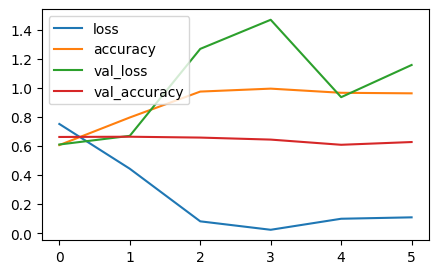

In [120]:
import pandas as pd

pd.DataFrame(history_baseline.history).plot(figsize = (5,3))